# This 

In [2]:
import matplotlib.pyplot as plt
from collections import Counter
from CoreGame.game import CrashGame

def run_simulation(game, num_simulations=1000):
    crash_points = []
    for _ in range(num_simulations):

        crash_points.append(game.play_game())
    return crash_points

game = CrashGame(0.99)
crash_points = run_simulation(game, num_simulations=1000)

Generating hash chain...
Hash chain generated successfully!


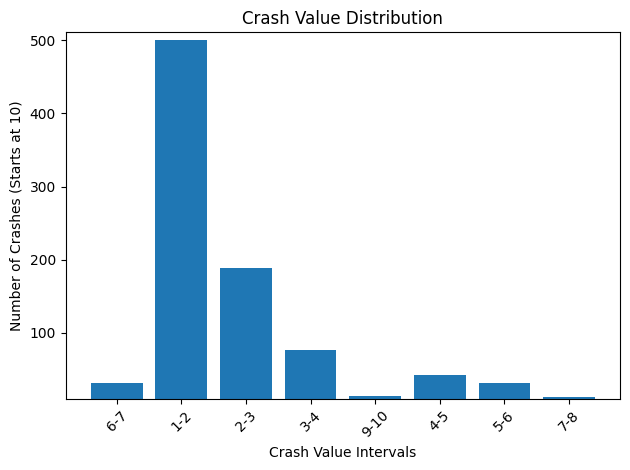

In [3]:
def create_bar_chart(crash_points):
    max_point = int(max(crash_points)) + 1
    interval_counts = Counter()

    for point in crash_points:
        for i in range(1, max_point):
            if point < i + 1:
                interval_counts[f"{i}-{i+1}"] += 1
                break

    # Filter out intervals with zero values
    filtered_intervals = {k: v for k, v in interval_counts.items() if v > 10}

    plt.ylim(bottom = 10, top = max(interval_counts.values()) + 10)

    plt.bar(filtered_intervals.keys(), filtered_intervals.values())
    plt.xlabel('Crash Value Intervals')
    plt.ylabel('Number of Crashes (Starts at 10)')
    plt.title('Crash Value Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


create_bar_chart(crash_points)

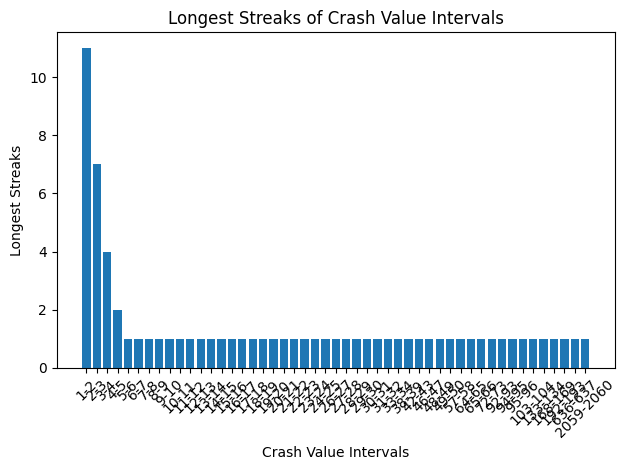

In [6]:
def find_longest_streaks(crash_points):
    max_point = int(max(crash_points)) + 1
    intervals = [f"{i}-{i+1}" for i in range(1, max_point)]
    
    # Initialize dictionary to store the longest streaks
    longest_streaks = {interval: 0 for interval in intervals}
    
    current_streak = {interval: 0 for interval in intervals}
    last_interval = None

    for point in crash_points:
        for i in range(1, max_point):
            if point < i + 1:
                current_interval = f"{i}-{i+1}"
                if current_interval == last_interval:
                    current_streak[current_interval] += 1
                else:
                    if last_interval is not None:
                        longest_streaks[last_interval] = max(longest_streaks[last_interval], current_streak[last_interval])
                    current_streak[current_interval] = 1
                last_interval = current_interval
                break
    
    # Final check for the last streak
    if last_interval is not None:
        longest_streaks[last_interval] = max(longest_streaks[last_interval], current_streak[last_interval])
    
    # Filter out intervals with zero values
    filtered_streaks = {k: v for k, v in longest_streaks.items() if v > 0}
    return filtered_streaks

def create_bar_chart(streaks):
    plt.bar(streaks.keys(), streaks.values())
    plt.xlabel('Crash Value Intervals')
    plt.ylabel('Longest Streaks')
    plt.title('Longest Streaks of Crash Value Intervals')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

longest_streaks = find_longest_streaks(crash_points)
create_bar_chart(longest_streaks)